# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БВТ2002 Кузнецов Алексей
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [ ]:
import copy
import math
import networkx as nx
import time
import queue

In [ ]:
class Vertex:
    def __init__(self, key):
        self.id = key
        self.connectedTo = {}

    def addNeighbor(self, nbr, weight=0):
        self.connectedTo[nbr] = weight

In [ ]:
from numpy import int16
class Graph:
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0

    def addVertex(self, key):
        if key not in self.vertList.keys():
            self.numVertices += 1
            self.vertList[key] = Vertex(key)

    def addEdge(self, f, t, cost=0):
        self.addVertex(f)
        self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], cost)

    def floyd(self, count_vert, target, start=0):
        Prev = [[None for j in range(count_vert)] for i in range(count_vert)] 
        d = []
        with open('matrix.txt', 'r') as f:
            for line in f:
                d.append(list(map(int, line.strip().split())))
        f.close()
        for i in range(count_vert):
            for j in range(count_vert):
                if d[i][j] == 0:
                    d[i][j] = math.inf
        for k in range(count_vert):
           for i in range(count_vert):
                for j in range(count_vert):
                    if d[i][k] < math.inf and d[k][j] < math.inf and d[i][k] + d[k][j] < d[i][j]:
                        d[i][j] = d[i][k] + d[k][j]
                        Prev[i][j] = Prev[k][j]
        d[start][start] = 0
        Path = [] 
        while j is not None: 
            Path.append(j) 
            j = Prev[i][j] 
        Path.append(start)
        Path.insert(0, target)
        Path = Path[::-1]
        return d[start][target], Path

    def dijkstra(self, count_vert, target, start=0):
        if target not in self.vertList.keys() or start not in self.vertList.keys():
            return math.inf
        visited = []
        array = {}
        for i in range(count_vert):
            array[i] = math.inf
        array[start] = 0
        array2 = [[] * count_vert] * count_vert 
        v = self.vertList[start]
        while len(visited) != count_vert:
            for i in v.connectedTo.keys():
                if array[i.id] > array[v.id] + v.connectedTo[i]:
                    array[i.id] = array[v.id] + v.connectedTo[i]
                    array2[i.id] = copy.copy(array2[v.id])
                    array2[i.id].append(v.id)
            visited.append(v.id)
            sd = sorted(array, key=array.get)
            for i in sd:
                if i not in visited:
                    v = self.vertList[i]
                    break
        for i in range(len(array2)):
            array2[i].append(i)
        return array[target], array2[target]

    def bellman_ford(self, count_vert, target, start=0):
        distance = [math.inf] * count_vert
        distance[start] = 0
        pred={}
        for _ in range(count_vert):
            for i in self.vertList.keys():
                for j in self.vertList[i].connectedTo.keys():
                    if distance[i] + self.vertList[i].connectedTo[j] < distance[j.id]:
                        distance[j.id] = distance[i] + self.vertList[i].connectedTo[j]
                        pred[j.id] = i

        for k in self.vertList.keys():
            for l in self.vertList[k].connectedTo.keys():
                try:
                    assert distance[k] + self.vertList[k].connectedTo[l] >= distance[l.id], 'negative cycle exists!'
                except KeyError:
                    pass
        previous = target
        path = []
        while pred:
            path.insert(0, previous)
            if previous == start:
                break
            previous = pred[previous]
        return distance[target], path

    def levit(self, count_vert, target, start=0):
        if target not in self.vertList.keys() or start not in self.vertList.keys():
            return math.inf
        m0, m1_2, m2 = [], [], []
        m1_1 = [start]
        for i in range(count_vert):
            if i != start:
                m2.append(i)
        array = [math.inf] * count_vert
        array[start] = 0
        array2 = [[] * count_vert] * count_vert
        while len(m1_1) != 0 or len(m1_2) != 0:
            if len(m1_2) != 0:
                v = self.vertList[m1_2[0]]
                m0.append(m1_2[0])
                m1_2.pop(0)
            elif len(m1_1) != 0:
                v = self.vertList[m1_1[0]]
                m0.append(m1_1[0])
                m1_1.pop(0)
            i = v.id
            v_neig = v.connectedTo.keys()
            for k in v_neig:
                j = k.id
                if j in m2:
                    array[j] = array[i] + v.connectedTo[k]
                    array2[j] = copy.copy(array2[i])
                    array2[j].append(i)
                    m1_1.append(j)
                    m2.remove(j)
                elif j in m1_1 or j in m1_2:
                    if array[j] > array[i] + v.connectedTo[k]:
                        array[j] = array[i] + v.connectedTo[k]
                        array2[j] = copy.copy(array2[i])
                        array2[j].append(i)
                elif j in m0:
                    if array[j] > array[i] + v.connectedTo[k]:
                        array[j] = array[i] + v.connectedTo[k]
                        array2[j] = copy.copy(array2[i])
                        array2[j].append(i)
                        m1_2.append(j)
                        m0.remove(j)
        for i in range(len(array2)):
            array2[i].append(i)
        return array[target], array2[target]

    def jonson(self, count_vert, g, target, start=0):
        dist = []
        for i in range(count_vert):
            self.addEdge(count_vert, i)
        for i in range(count_vert):
            dis, path = self.bellman_ford(count_vert+1, i, count_vert)
            dist.append(dis)
        for i in range(count_vert):
            for j in g.vertList[i].connectedTo.keys():
                g.vertList[i].connectedTo[j] += dist[i] - dist[j.id]
        
        dist1, path1 = g.dijkstra(count_vert, target, start=0)
        dist1 = dist1 - dist[start] + dist[target]
        return dist1, path1

    def iena(self, count_vert, col, target, start=0):
        slov = {}
        dist, path = self.dijkstra(count_vert, target, start)
        slov[dist] = path
        candidates = []
        candidates_length = []
        while len(slov) != col:
            root_path = []
            g = copy.deepcopy(self)
            l1 = 0
            for i in range(len(slov[dist])-1):
                if i != 0:
                    root_path.append(slov[dist][i-1])
                l1 += g.vertList[slov[dist][i]].connectedTo[g.vertList[slov[dist][i+1]]]
                l2 = g.vertList[slov[dist][i]].connectedTo[g.vertList[slov[dist][i+1]]]
                del g.vertList[slov[dist][i]].connectedTo[g.vertList[slov[dist][i+1]]]
                l, spur_path = g.dijkstra(count_vert, target, slov[dist][i])
                total_path = root_path+spur_path
                if total_path not in candidates and total_path not in slov.values():
                    candidates.append(total_path)
                    if i == 0:
                        candidates_length.append(l)
                    else: 
                        candidates_length.append(l+l1-l2)
            index = candidates_length.index(min(candidates_length))
            if candidates_length[index] == math.inf:
                break
            slov[candidates_length[index]] = candidates[index]
            dist = candidates_length[index]
            candidates_length.pop(index)
            candidates.pop(index) 
            
        return slov


In [ ]:
g = Graph()
file = open('matrix.txt', 'r')
count = 0

G = nx.DiGraph()

for line in file:
    g.addVertex(count)
    lst = [int(x) for x in line.split()]
    
    if count == 0: 
        G.add_nodes_from(list(range(0,len(lst))))
    
    for i in range(len(lst)):
        if lst[i] != 0:
            G.add_edge(count, i, length = lst[i])
            g.addEdge(count, i, lst[i])
    count += 1
file.close()  

(10, [0, 5, 4])
(10, [0, 5, 4])
(10, [0, 5, 4])
(10, [0, 5, 4])
(10, [0, 5, 4])
{10: [0, 5, 4], 20: [0, 5, 2, 3, 4], 24: [0, 5, 2, 3, 5, 4], 25: [0, 1, 2, 3, 4], 29: [0, 1, 2, 3, 5, 4]}
--- 0.004717111587524414 seconds ---


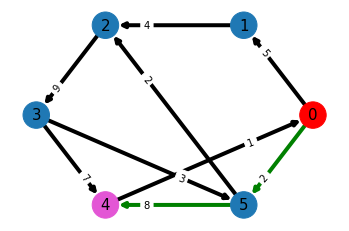

In [ ]:
start_time = time.time()
print(g.dijkstra(count, 4, 0))
print(g.levit(count, 4, 0))
print(g.bellman_ford(count, 4, 0))
print(g.floyd(count, 4, 0))
print(g.jonson(count, copy.deepcopy(g), 4, 0))
print(g.iena(count, 20, 4, 0))
dist, path = g.dijkstra(count, 4, 0)
print("--- %s seconds ---" % (time.time() - start_time))

pos = nx.circular_layout(G)
edge_colors = []
node_colors = []
label=dict([((u,v,),d['length']) for u, v, d in G.edges(data=True)])

for u, v in G.edges():
    if u in path and v in path:
        k, l = path.index(u), path.index(v)
        if abs(k - l) == 1:
            edge_colors.append('g')
        else:
            edge_colors.append('k')
    else:
        edge_colors.append('k')

for i in G.nodes():
    if i in path:
        if path.index(i) == 0:
            node_colors.append('r')
        elif path.index(i) == len(path)-1:
            node_colors.append('#e356d5')
        else:
            node_colors.append('#1f78b4')
    else:
        node_colors.append('#1f78b4')

nx.draw_networkx_edge_labels(G, pos, edge_labels=label, label_pos=0.3, font_size=10)       
nx.draw(G, pos, edge_color=(edge_colors), node_color = (node_colors), node_size = 700, width = 4, font_size = 15, with_labels=True)

### Вывод